# Explorative Datenanalyse

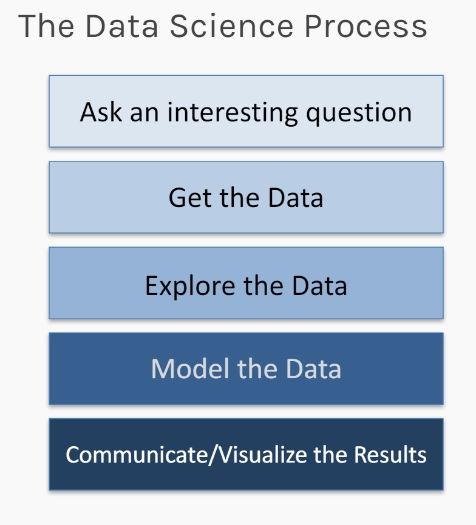

Quelle: Protopapas, Rader, Tanner, CS109 Data Science, 2020 [Link](https://github.com/Harvard-IACS/2020-CS109A/blob/master/content/lectures/lecture01/slides/Lecture1_Introduction.pdf)

Wir verfolgen wieder den Data Science Workflow, fokussieren in diesem Notebook aber auf den 3. Schritt, **Explore the Data**.

Als Datensatz nehmen wir einen generierte Liste mit dem Sustainability Rating von ca. 15000 Firmen

## Schritt 1: Ask an interesting question

## Schritt 2: Get the Data

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

In [18]:
url_webpage = 'https://raw.githubusercontent.com/JensKohl/Lecture-Technical_Applications_Data_Management-Slides_and_Notebooks/main/Datasets/sustainability_scores.csv' # wir speichern den Pfad für die Datei in der Variable url_webpage
Sustainability_df = pd.read_csv(url_webpage, sep=',') # einzelnen Einträge in CSV sind durch , getrennt. Oft werden diese aber auch per ; getrennt

In [19]:
# Geben Sie den Namen des Dataframes an und führen Sie die Zelle aus. Damit sehen Sie, ob das Einlesen funktioniert hat
Sustainability_df

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
0,0921706 BC LTD,NaN,CA,Telecommunication Services,Wireless Telecommunication Services,A,6.6,10.0,7.4,2.7
1,1 MADISON OFFICE FEE LLC,NaN,US,Real Estate Management & Services,Office REITs,BBB,4.7,8.5,5.8,2.6
2,1&1 AG,1U1,DE,Telecommunication Services,Wireless Telecommunication Services,B,2.0,7.8,3.3,4.4
3,"1-800-FLOWERSCOM, INC",FLWS,US,Retail - Consumer Discretionary,Internet & Direct Marketing Retail,BBB,5.6,1.2,6.7,3.8
4,"1000 AUAHI, LLC",NaN,US,Real Estate Development & Diversified Activities,Real Estate Development,A,6.8,6.1,4.1,6.9
...,...,...,...,...,...,...,...,...,...,...
15641,secunet Security Networks Aktiengesellschaft,YSN,DE,Software & Services,IT Consulting & Other Services,BB,3.1,7.0,2.9,4.1
15642,thyssenkrupp AG,TKA,DE,Steel,Steel,AA,8.4,5.3,4.9,6.2
15643,transcosmos inc,9715,JP,Software & Services,Data Processing & Outsourced Services,B,1.9,7.0,3.2,1.5
15644,u-blox Holding AG,UBXN,CH,Semiconductors & Semiconductor Equipment,Semiconductors,A,6.1,3.6,5.5,6.9


## Schritt 3: Explore the data

Wir schauen uns das Dataset genauer an.
Wir werden in diesem Abschnitt folgendes machen:
* deskriptive Analytics. Wie ist die Datei aufgebaut? Was steht da drinnen?
* nach Nullwerte schauen und ggf. ersetzen
* Entdecken von Ausreißern oder Anomalien
* Entdecken von Mustern


In [20]:
Sustainability_df.dtypes

Company Name            object
Ticker                  object
Country                 object
Sector                  object
Subsector               object
Overall ESG RATING      object
Overall ESG SCORE      float64
Environmental SCORE    float64
Social SCORE           float64
Governance SCORE       float64
dtype: object

Wir schauen uns die Datentypen an, damit wir wissen, welche Variablen wir haben. Plots können wir für folgende Typen durchführen:
* float64 = Reelle Zahlen
* int64 = Ganzzahlen
* Categorical
* object = Text

In [21]:
# Schauen Sie sich die ersten 10 Zeilen des Dataframes an 
Sustainability_df.head(10)

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
0,0921706 BC LTD,NaN,CA,Telecommunication Services,Wireless Telecommunication Services,A,6.6,10.0,7.4,2.7
1,1 MADISON OFFICE FEE LLC,NaN,US,Real Estate Management & Services,Office REITs,BBB,4.7,8.5,5.8,2.6
2,1&1 AG,1U1,DE,Telecommunication Services,Wireless Telecommunication Services,B,2.0,7.8,3.3,4.4
3,"1-800-FLOWERSCOM, INC",FLWS,US,Retail - Consumer Discretionary,Internet & Direct Marketing Retail,BBB,5.6,1.2,6.7,3.8
4,"1000 AUAHI, LLC",NaN,US,Real Estate Development & Diversified Activities,Real Estate Development,A,6.8,6.1,4.1,6.9
5,1011778 BC UNLIMITED LIABILITY COMPANY,NaN,CA,Restaurants,Restaurants,BB,3.9,5.3,3.6,4.4
6,10X Genomics Inc,TXG,US,Health Care Equipment & Supplies,Life Sciences Tools & Services,BB,3.4,6.1,3.9,5.1
7,"1334 YORK, LLC",NaN,US,Diversified Consumer Services,NaN,BBB,5.5,6.7,5.4,3.6
8,"180 MEDICAL, INC",NaN,US,Health Care Equipment & Supplies,Health Care Supplies,AA,8.4,10.0,5.2,7.1
9,"1LIFE HEALTHCARE, INC",ONEM,US,Health Care Providers & Services,Health Care Services,A,6.3,6.3,6.0,4.2


Fangen wir mit der deskriptiven Analyse an. Ein guter Einstieg ist der Befehl describe von Pandas. Wir lernen später noch eine bessere Methode kennen, die vieles für uns abdeckt (Pandas Profiling).

Wir müssen hier aber noch einen Einschub machen und einzelne Texte in Kategorische Variablen umwandeln, damit wir diese Plotten können.
Das ist ein Bestandteil des Data Engineerings.

In [38]:
Sustainability_df['Sector'] = Sustainability_df['Sector'].astype('category') # wandel Sector in kategorische Variable um
Sustainability_df['Country'] = Sustainability_df['Country'].astype('category') # wandel Country in kategorische Variable um
Sustainability_df['Subsector'] = Sustainability_df['Subsector'].astype('category') # wandel Subsector in kategorische Variable um
Sustainability_df['Overall ESG RATING'] = Sustainability_df['Overall ESG RATING'].astype('category') # wandel Subsector in kategorische Variable um

Sustainability_df.dtypes

Company Name             object
Ticker                   object
Country                category
Sector                 category
Subsector              category
Overall ESG RATING     category
Overall ESG SCORE       float64
Environmental SCORE     float64
Social SCORE            float64
Governance SCORE        float64
dtype: object

Wir sehen, daß die Datentypen umgewandelt wurden.

In [39]:
# Verwenden Sie die Methode describe mit Parameter include='all auf Ihr Dataframe
Sustainability_df.describe(include='all')

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
count,15646,10441,15644,15646,14860,15646,15646.000000,15646.000000,15646.000000,15646.000000
unique,15560,9255,108,69,159,7,NaN,NaN,NaN,NaN
top,BANK OF CHINA LIMITED,BRK,US,Banks,Diversified Banks,A,NaN,NaN,NaN,NaN
freq,5,17,4684,2085,1413,3453,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.143982,5.315371,4.617442,4.789908
std,NaN,NaN,NaN,NaN,NaN,NaN,2.333359,2.407642,1.591180,1.592997
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.400000,3.500000,3.600000,3.800000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,5.200000,4.600000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,5.600000,6.000000


Wir können hier schon einige deskriptive Sachen ableiten:
* **Zeile Count**: wir haben hin Spalten bis zu 15646 Werten, für Ticker jedoch nur 10441. Das heißt mehr als 5000 Firmen haben keinen Aktienticker-Kürzel (oder nicht in der Datei)
* **Zeile unique**: Es gibt 159 verschiedene Werte für Subsektor und 69 für Sektor.
* **Zeile Top**: was die häufigsten Werte sind in einer Spalte mit mehreren gleichen Einträgen, z.B. Bank of China für Company Name.
* **Zeile Frequency**: wie häufig der top Eintrag vorkommt, bspw. Bank of China fünf mal.
* **Zeile mean**: Mittelwert, z.B. 5,1 beim ESG Score.
* **Zeile Std**: Standardabweichung, d.h. durchschnittliche Breite der Streuung einzelner Werte um den Mittelwert herum.
* **Zeile min**: geringster Wert, bspw. 2,3 für ESG Score
* **Zeile max**: höchster Wert, bspw. 10 für ESG Scorre.
* **Zeile 50%**: dieser auch Median genannte Wert, der genau in der Mitte der Daten liegt, d.h. er teilt die Daten der Spalte in 2 genau gleich große Untermengen (Beispiel: für die Menge 1, 3, 4, 10, 15, 20, 40 ist 10 der Median, da links und rechts jeweils 3 Elemente sind). Bei einer Menge mit einer geraden Anzahl werden die "beiden Mitten" durch 2 geteilt und dieser Wert als Median genommen.
* **Zeile 25%**, das untere Quantil. Teilt die untere Teilmenge kleiner 50% wiederum in 2 gleich große Mengen. Wir erhalten die Zahl, die die untere Teilmenge geteilt hat. Diese Zahl ist somit größer als 25% der Daten (Beispiel: aus der oberen Menge erhalten wir 1, 3, 4. Somit ist 3 der Median der unteren Menge und dadurch das 25% Quantil der gesamten Menge).
* **Zeile 75%**, das obere Quantil. Teilt die obere Teilmenge wiederum in 2 gleich große Mengen. Wir erhalten einen Wert, der größer ist als 75% der Werte.

Wir verwenden zum Plotten die Libraries [Matplotlib](https://matplotlib.org/) sowie [Seaborn](https://seaborn.pydata.org/index.html), eine graphische Verschönerung von Matplotlib. 

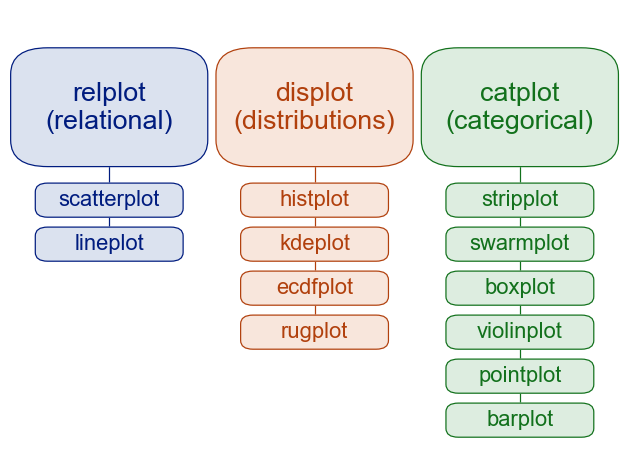

Quelle: [Link](https://seaborn.pydata.org/tutorial/function_overview.html)

Das Bild zeigt die 3 verschiedenen Kategorien von Plots:
* Relational: Zusammenhang bzw. Beziehung zwischen verschiedenen Variablen (Zahlenwerte)
* Distribution: welche Werte ein Features annehmen kann (Zahlenwerte)
* Categorical: Plots für kategorische Werte. Kategorische Variablen sind Variablen, die nur einen Wert aus einer definierten Menge haben können (bspw. Farben: rot, grün, ...)

Welche Werte werden geplottet? 
* Zahlen (Ganzzahlen, reelle Zahlen)
* Kategorische Variablen

Bevor wir mit dem Plotten anfangen, setzen wir noch eine Standardeinstellung, die Größe von Plots, ein.

In [8]:
plt.figure(figsize=(16, 6)) #change size of plots

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

### Relational Plots

#### Scatterplot

Scatterplots eignen sich für Untersuchungen zwischen Zahlen, bspw. star rating vs. duration.

Die Doku für Scatterplot finden wir [hier](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) folgendes:
seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

sowie diesen Auszug der Detaillierung:

Parameters
x, y : vectors or keys in data Variables that specify positions on the x and y axes.

hue: vector or key in data Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

data: pandas.DataFrame, numpy.ndarray, mapping, or sequence Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

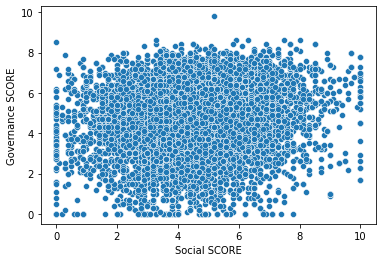

In [40]:
ax = sns.scatterplot(y="Governance SCORE", x="Social SCORE", data=Sustainability_df)

### Verteilungen

#### Histogram

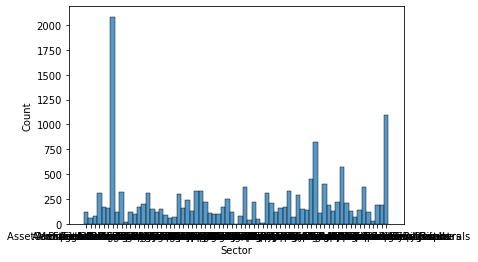

In [41]:
ax = sns.histplot(x="Sector", data= Sustainability_df)

Was sagt Ihnen diese Auswertung?

Wir versehen unsere Plots jetzt mit mehr Informationsgehalt, indem wir einen Titel hinzufügen.
Zusätzlich wollen wir uns nicht die Anzahl, sondern den prozentualen Anteil zeigen lassen. Dazu versehen wir den Plot mit dem Parameter stat="percent".

Probieren Sie auch aus, wie es ohne diesen Parameter aussieht.

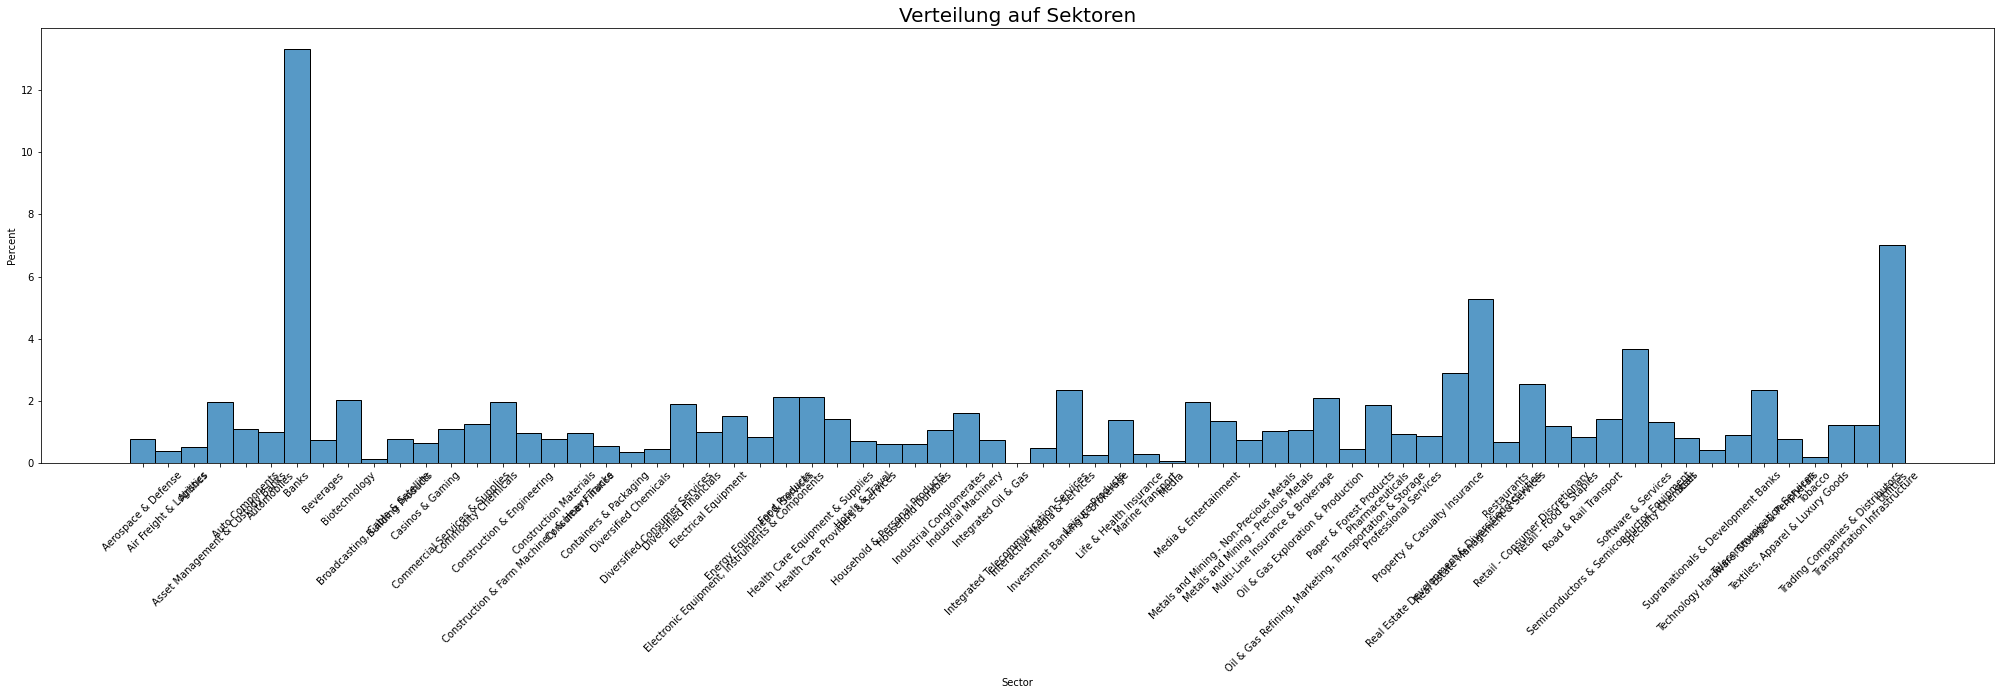

In [55]:
# Histogramm über Star rating und Visualisierung mit Prozent.

plt.figure(figsize=(35, 8)) #change size of plots

ax = sns.histplot(x="Sector", data= Sustainability_df, stat="percent")
# füge einen Titel hinzu mit Schriftgröße 20.
ax.axes.set_title("Verteilung auf Sektoren", fontsize=20)
plt.xticks(rotation=45);

Was sagt Ihnen diese Auswertung?

Nun sind Sie dran: probieren Sie die in der Vorlesung vorgestellten Plots aus und diskutieren Sie die Ergebnisse!

Company Name	Ticker	Country	Sector	Subsector	Overall ESG RATING	Overall ESG SCORE	Environmental SCORE	Social SCORE	Governance SCORE

Beispiele für Auswertungen:
* Welcher Sektor hat die meisten Firmen? (Histogram: Sector).
  * Geben Sie das Histogram in absoluten und dann Prozentwerten ausg.
  * Integrieren Sie das Rating (Hue="Overall ESG RATING")
* Was ist die häufigste ESG-Rating? (Histogram/ KDEPlot: Overall ESG RATING)
* Was ist das häufigste Governance Rating? In absoluten oder Prozentzahlen (Histogram/ KDEPlot: Governance SCORE)
* Gibt es einen Zusammenhang zwischen Subsector und Rating? (Stripplot/ Boxplot: Subsector vs. Overall ESG RATING)
* Was ist das durchschnittliche Overall Rating je Branche (Barplot: Sector vs. Overall ESG Score). Erweitern Sie den Plot mit einer Unterteilung in Rating-Kategorie (hue="Overall ESG RATING").
* Wie ist die Verteilung des Environmental, Social oder Governance Score über die Ratings? (box plot mit x = "Overall ESG Rating", y = "Enviromental Score", kind="box")
* Gibt es Zusammenhänge zwischen den einzelnen Scores (replot mit x und y je einen der SCORE-Werte). Integrieren Sie eine Unterscheidung nach Rating (hue="Overall ESG RATING").

* Schauen Sie sich ein beliebigen Sektor an, z.B. Banks. Machen Sie die gleichen Auswertungen: Gibt es Unterschiede? ACHTUNG: hierfür müssen Sie das Dataset filtern. Dafür gibt es 2 Möglichkeiten:
  * Sie geben für jedes Plot beim Parameter data folgendes ein  data=Sustainability_df[Sustainability_df['Sector']=="Banks"])
  * Sie bauen einen neuen Dataset, welches Sie dann weiter verwenden. Dies funktioniert über:
    * Schritt 1: Bau neues Dataframe: Sustainability_banks_df = Sustainability_df[Sustainability_df['Sector']=="Banks"]
    * Schritt 2: Verwenden des Dataframes wie gehabt




* Rating: Schauen Sie sich ein beliebiges Rating an, bspw. die schlechtesten Firmen mit "CCC". Wie heißt der Filter? Was sehen Sie für Erkenntnisse? ACHTUNG: hierfür müssen Sie wie bei der obigen Frage die Menge nach dem gewählten Rating filtern…..

